In [1]:
%load_ext autoreload
%autoreload 2

## Esercizio: Tossicità dell'Acqua

**Si vuole calibrare un modello per la tossicità dell'acqua per [un tipo di pesce](https://en.wikipedia.org/wiki/Fathead_minnow)**

<center>
<img src="assets/minnow.jpeg" width="55%"/>
</center>

* Una dataset nel file `qsar_aquatic_toxicity.csv`, nella cartella `data`
* Si tratta di dati pubblici dal [repository dell'Università della California, Irvine](https://archive.ics.uci.edu/ml/datasets.php)

## Esercizio: Tossicità dell'Acqua

**Si proceda al caricamento dei dati**

* Allo scopo, si utilizzi la funzione `example.analyze.read_csv`
* Si stampi quindi l'intestazione del file (nomi delle colonne)
* ...E le prime 5 righe della tabella

In [3]:
import os
from base import analyze

fname = os.path.join('data', 'qsar_aquatic_toxicity.csv')
data, header = analyze.read_csv(fname)
print(header)
print(data[:5, :])

['TPSA(Tot)', 'SAacc', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040', 'quantitative response, LC50 [-LOG(mol/L)]']
[[ 0.     0.     0.     2.419  1.225  0.667  0.     0.     3.74 ]
 [ 0.     0.     0.     2.638  1.401  0.632  0.     0.     4.33 ]
 [ 9.23  11.     0.     5.799  2.93   0.486  0.     0.     7.019]
 [ 9.23  11.     0.     5.453  2.887  0.495  0.     0.     6.723]
 [ 9.23  11.     0.     4.068  2.758  0.695  0.     0.     5.979]]


## Esercizio: Tossicità dell'Acqua

**Si osservino mediante grafici di dispersione le relazioni tra ingressi ed uscite**

Il dataset considerato ha più di una variabile di ingresso

* L'ultima colonna rappresenta l'uscita
* Le prime colonne rappresentano gli ingressi

Si consiglia di utilizzare un ciclo per iterare sulle prime colonne

* Ad ogni iterazione può essere costruito un grafico di dispersione

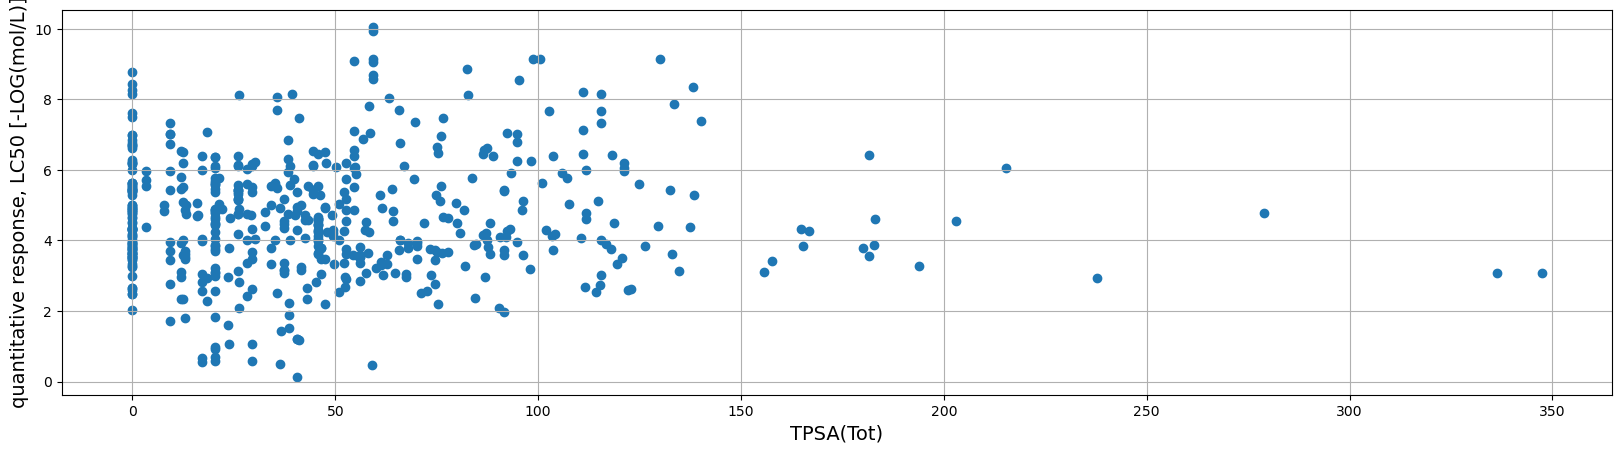

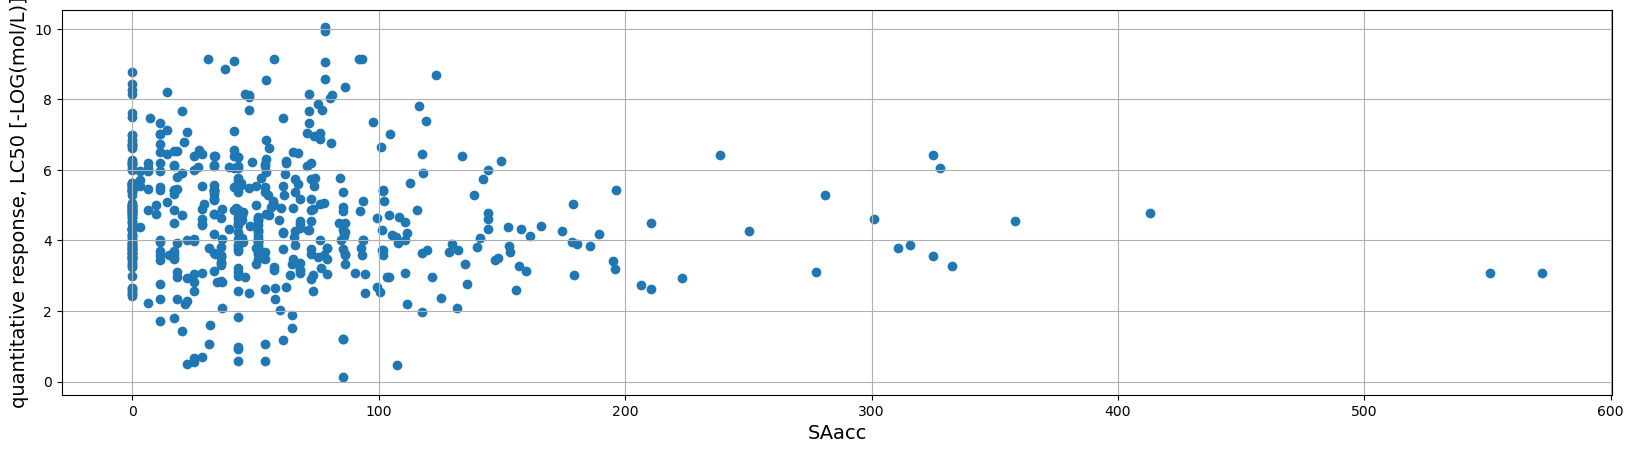

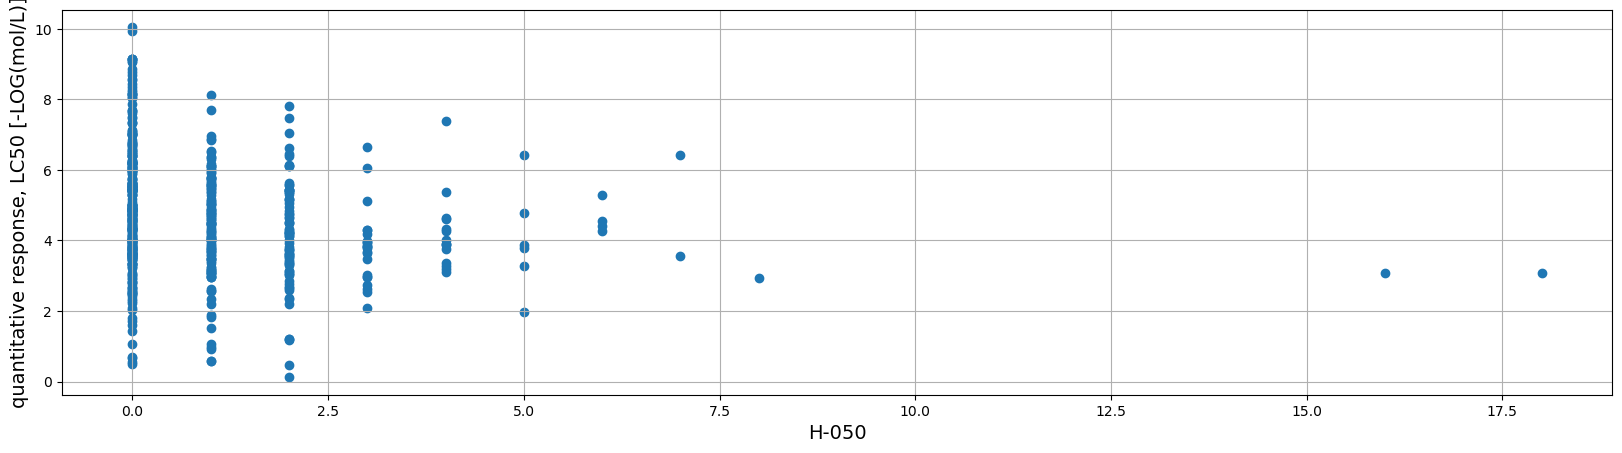

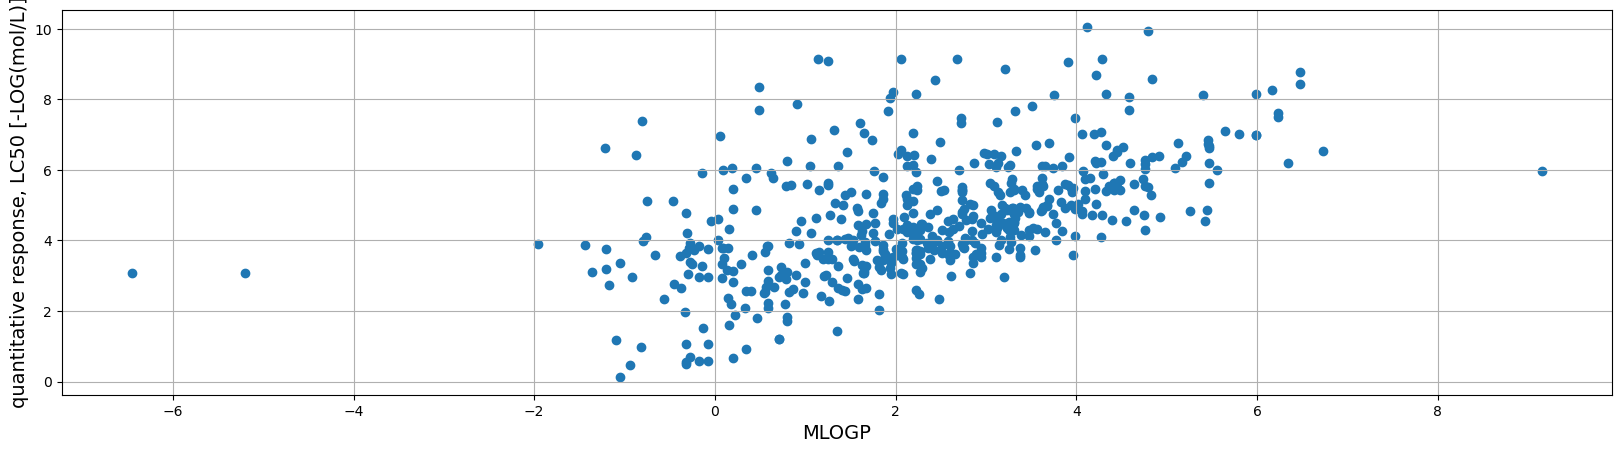

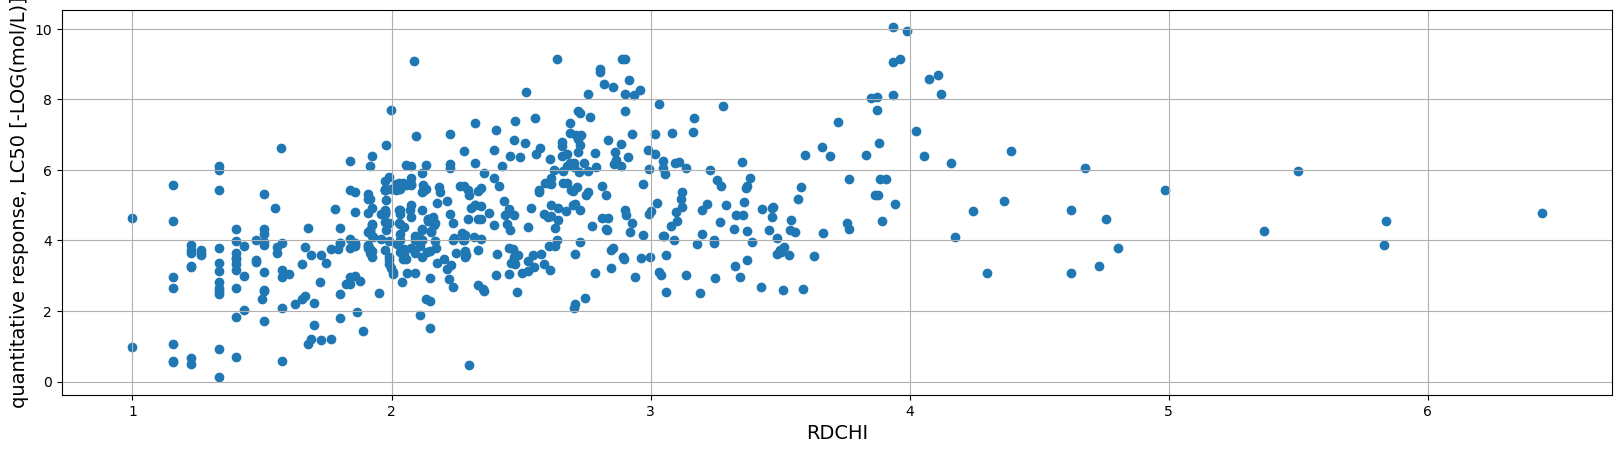

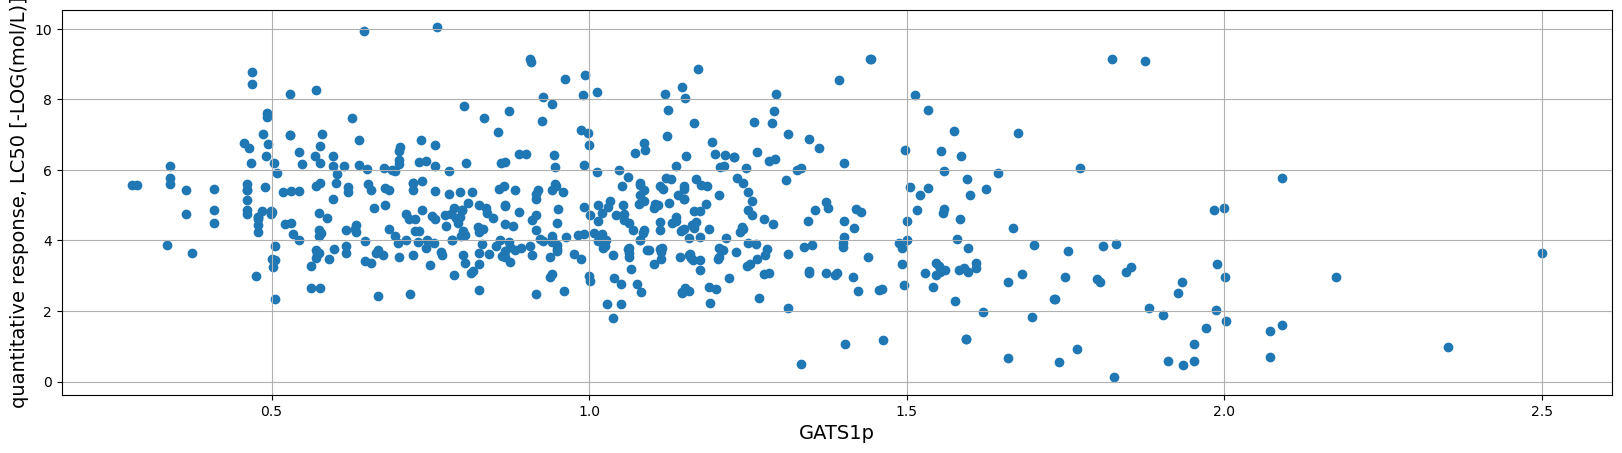

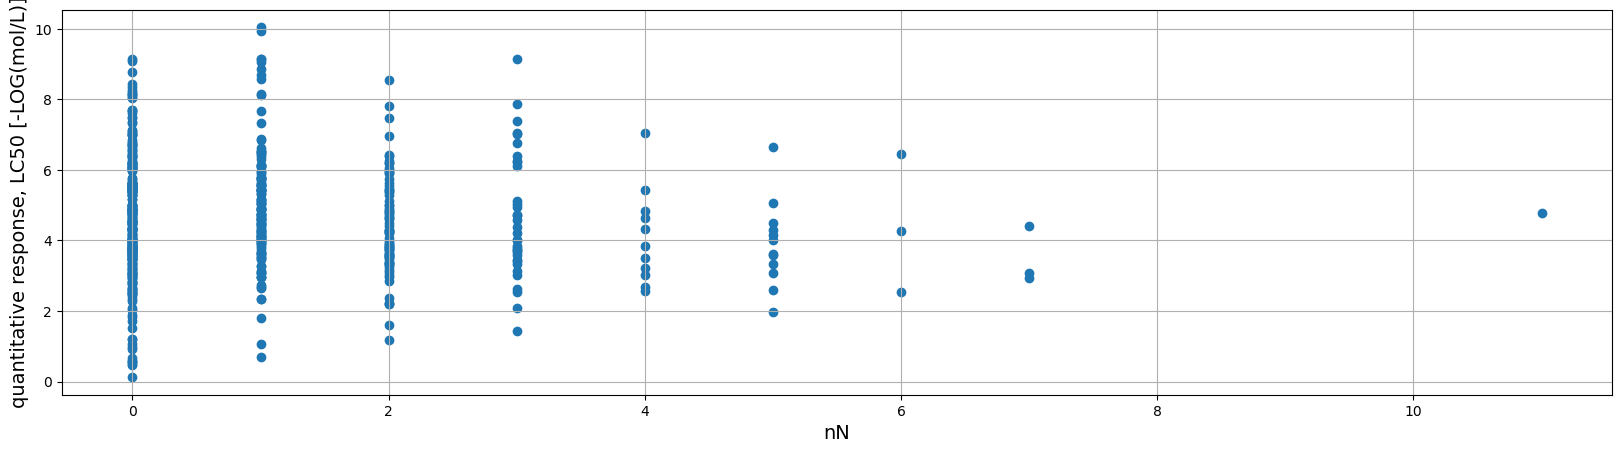

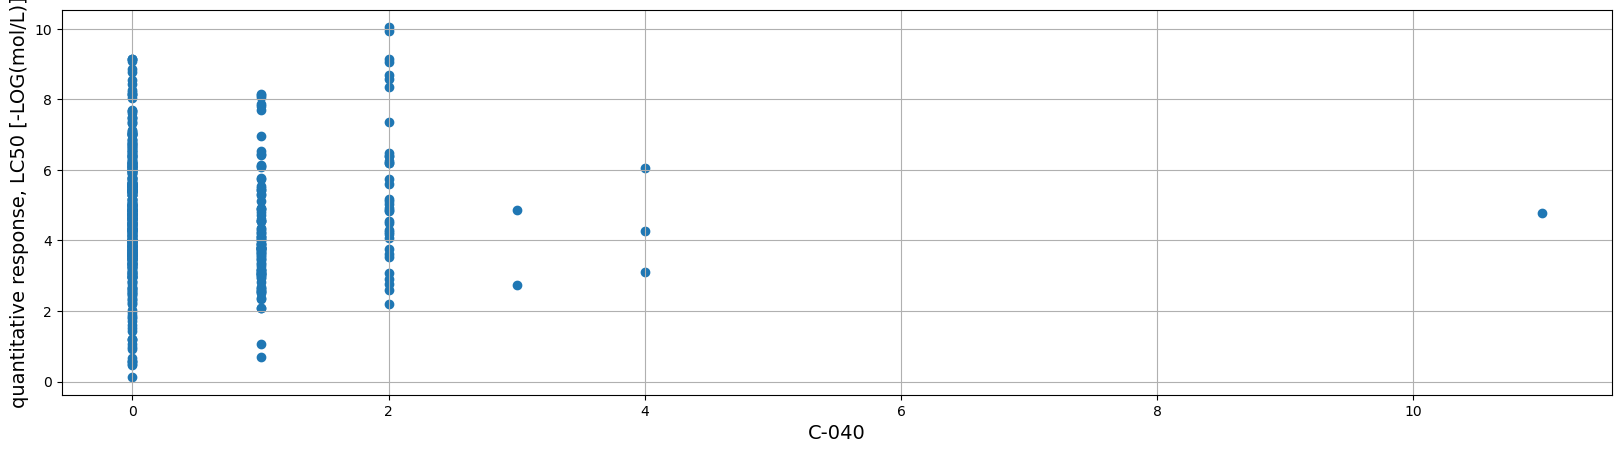

In [4]:
in_cols = [data[:, i] for i in range(len(header)-1)]
out_col = data[:, -1]

for col, hdr in zip(in_cols, header[:-1]):
    analyze.scatter(col, out_col, xlabel=hdr, ylabel=header[-1], figsize=(20, 5))

## Esercizio: Tossicità dell'Acqua

**Si calibri un modello mediate il metodo dei minimi quadrati**

Il modello deve essere nella forma:

$$
f(x_i) = \sum_{j = 0}^{n-1} \alpha_j x_{i,j}
$$

Dove:

* $j$ indica l'indice di una delle colonne di ingresso
* $i$ indica l'indice di un esempio (mostrato solo per chiarezza)

Intuitivamente, il modello è una sommma pesata dei valori degli ingressi

* Per la calibrazione si utilizzi `example.analyze.fit`
* Si stampino i valori dei coefficienti e del SSE

In [5]:
alpha, sse = analyze.fit(in_cols, out_col)

print(f'SSE: {sse:.3f}')
for h, v in zip(header, alpha):
    print(f'Coefficiente per "{h}": {v:.3f}')

SSE: 952.703
Coefficiente per "TPSA(Tot)": 0.032
Coefficiente per "SAacc": -0.023
Coefficiente per "H-050": 0.244
Coefficiente per "MLOGP": 0.591
Coefficiente per "RDCHI": 0.974
Coefficiente per "GATS1p": 0.532
Coefficiente per "nN": -0.242
Coefficiente per "C-040": -0.050


## Esercizio: Tossicità dell'Acqua

**Si osservi la qualità delle previsioni mediante un grafico di dispersione**

* Si riportino i valori misurati sull'asse delle ascisse
* ...Ed i valori stimati dal modello sull'asse delle ordinate

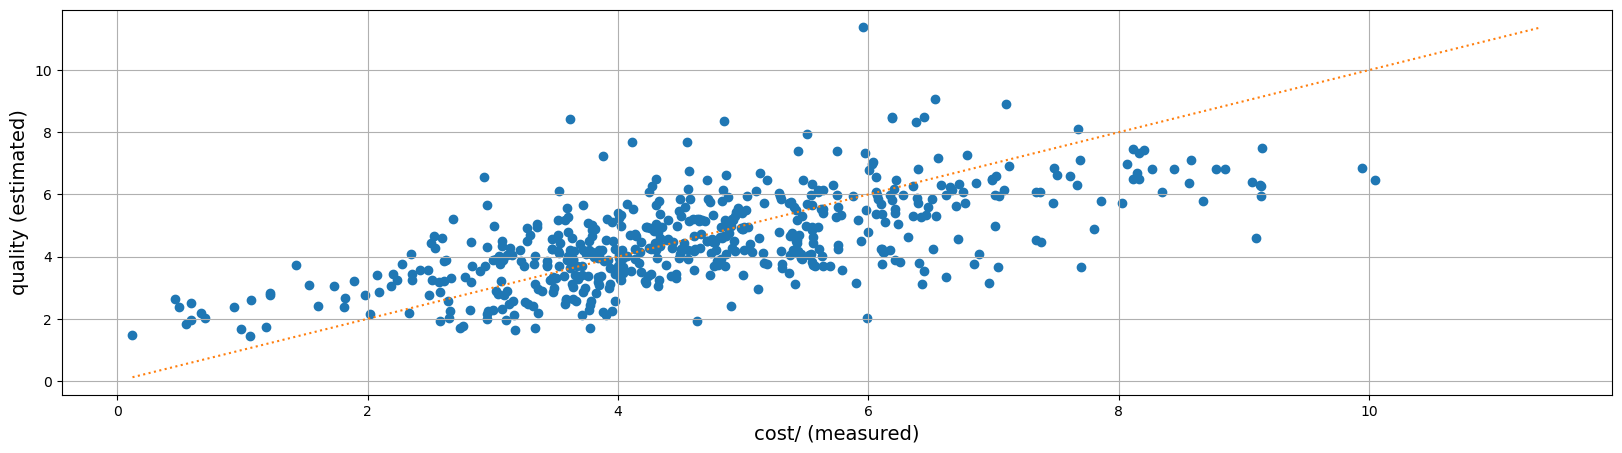

In [6]:
import numpy as np
yp = sum(col * v for col, v in zip(in_cols, alpha))

analyze.scatter(out_col, yp, xlabel='cost/ (measured)', ylabel='quality (estimated)', figsize=(20, 5), add_bisector=True)